In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(224, 224)):
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0) / 255.0  # Normalize and add batch dimension
    return image

def extract_coordinates(filename):
    parts = filename.split('_')
    lat = float(parts[2])
    lon = float(parts[3].split('.')[0])  # Exclude file extension and possible grid info
    return lat, lon


In [23]:
model_path = r'C:\Users\lyq09mow\Model\Bar_Ber_Mad_Rom\85cent2_frankfurt.keras'
model = tf.keras.models.load_model(model_path)

In [25]:
image_dir = r'C:\Users\lyq09mow\DataImages\kaiserslautern-de\images'
files = os.listdir(image_dir)
predictions = {}

for file in files:
    img_path = os.path.join(image_dir, file)
    image = preprocess_image(img_path)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=-1)[0]
    lat, lon = extract_coordinates(file)
    predictions[(lat, lon)] = predicted_class


1/1 [==============================] - 0s 57ms/step


In [32]:
# Get latitudes and longitudes
coords = list(predictions.keys())
latitudes, longitudes = zip(*coords)
min_lat, max_lat = min(latitudes), max(latitudes)
min_lon, max_lon = min(longitudes), max(longitudes)

# Define grid dimensions
lat_range = max(max_lat - min_lat, 0.0001)  # Ensure non-zero range
grid_size_lat = max(int(lat_range * 10000), 100)  # Default minimum grid size for visibility

# Here, we set a default grid size for longitude since there's no variation
grid_size_lon = 100  # A default size to spread out data artificially
grid = np.zeros((grid_size_lat, grid_size_lon), dtype=int)

# Fill grid
for (lat, lon), class_idx in predictions.items():
    x = int((lat - min_lat) / lat_range * (grid_size_lat - 1))
    # Spread data points evenly across the longitude axis since there's no real variance
    y = int(grid_size_lon * np.random.rand())  # Randomly distribute across the longitude dimension
    grid[x, y] = class_idx

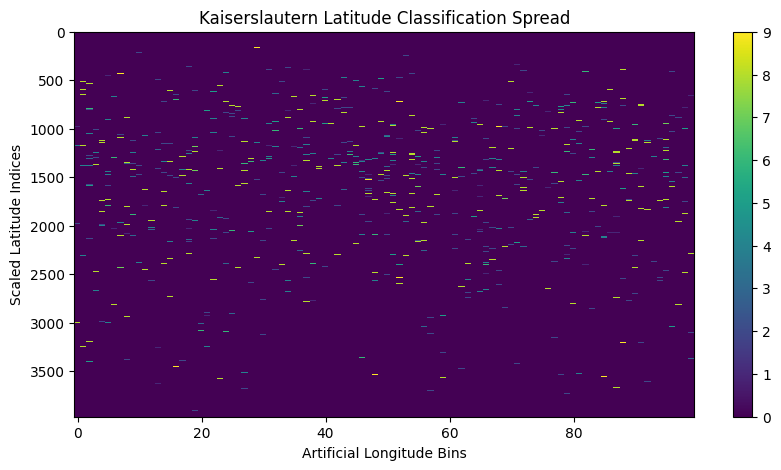

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Adjust figure size to better fit the data proportions
plt.imshow(grid, cmap='viridis', interpolation='nearest', aspect='auto')  # 'auto' adjusts the aspect ratio
plt.colorbar()
plt.title('Kaiserslautern Latitude Classification Spread')
plt.xlabel('Artificial Longitude Bins')
plt.ylabel('Scaled Latitude Indices')
plt.show()


output_dir = r'C:\Users\lyq09mow\Performance'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
plt.imsave(os.path.join(output_dir, 'kaiserslautern_classification_map.png'), grid, cmap='viridis')


Visualizing Layer: Airports


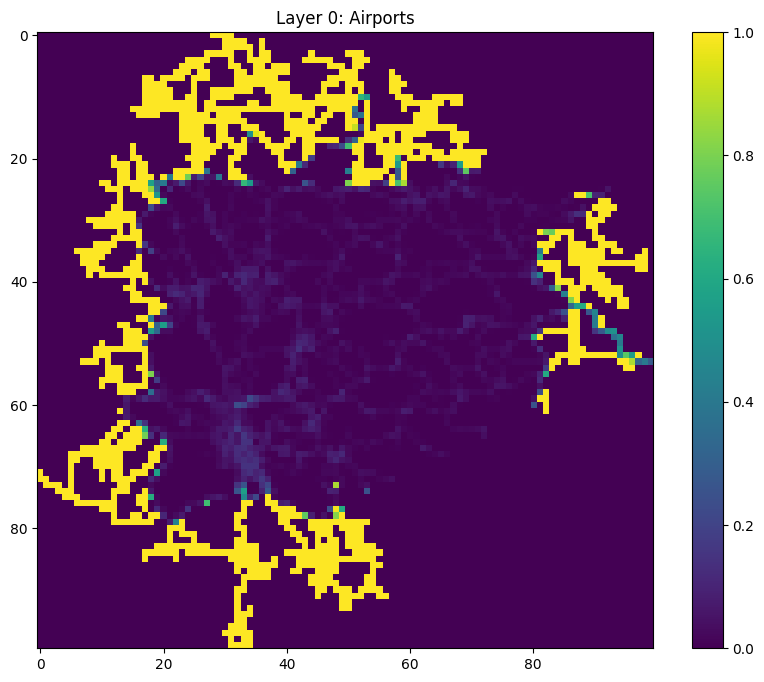

Layer 1: High Density Urban Fabric - All zero data
Layer 2: Low Density Urban Fabric - All zero data
Layer 3: Medium Density Urban Fabric - All zero data
Visualizing Layer: Fast transit roads and associated land


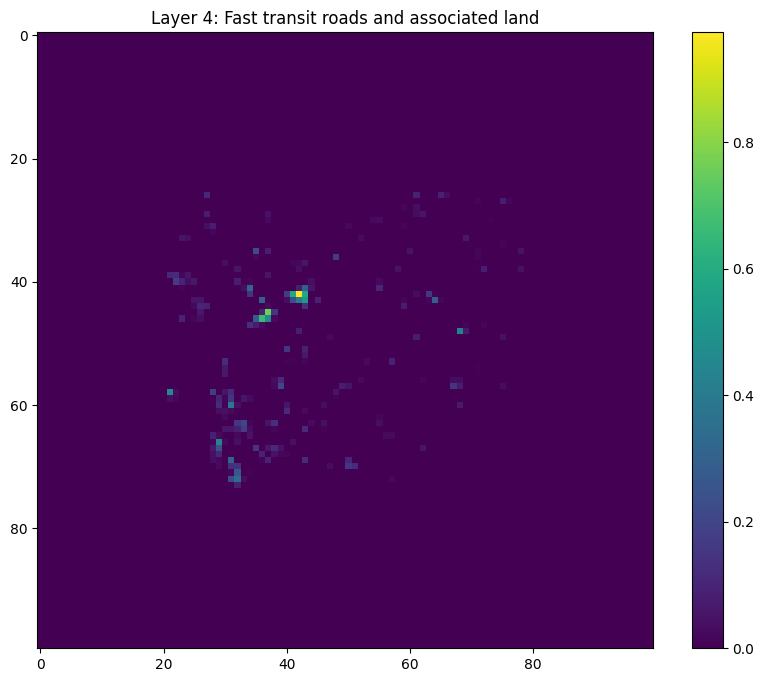

Visualizing Layer: Forests


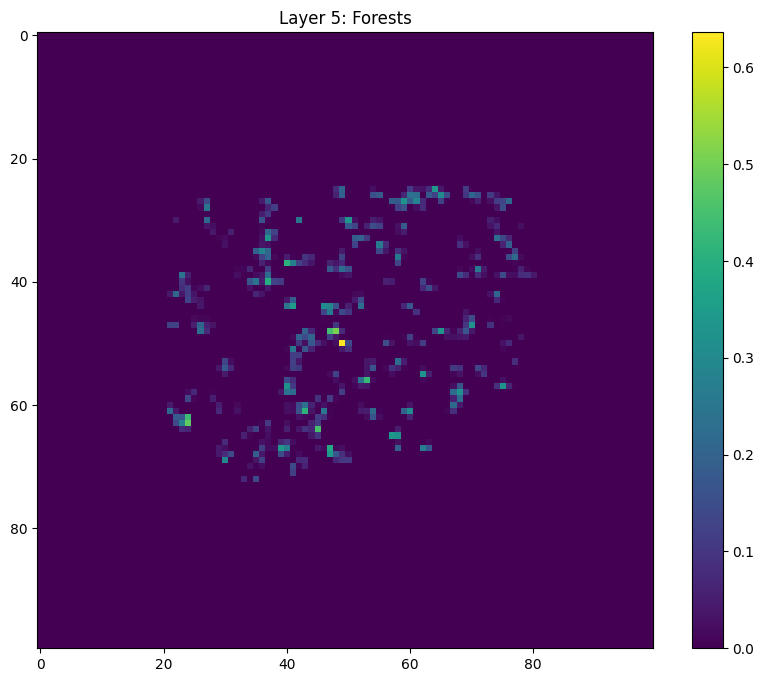

Visualizing Layer: Green urban areas


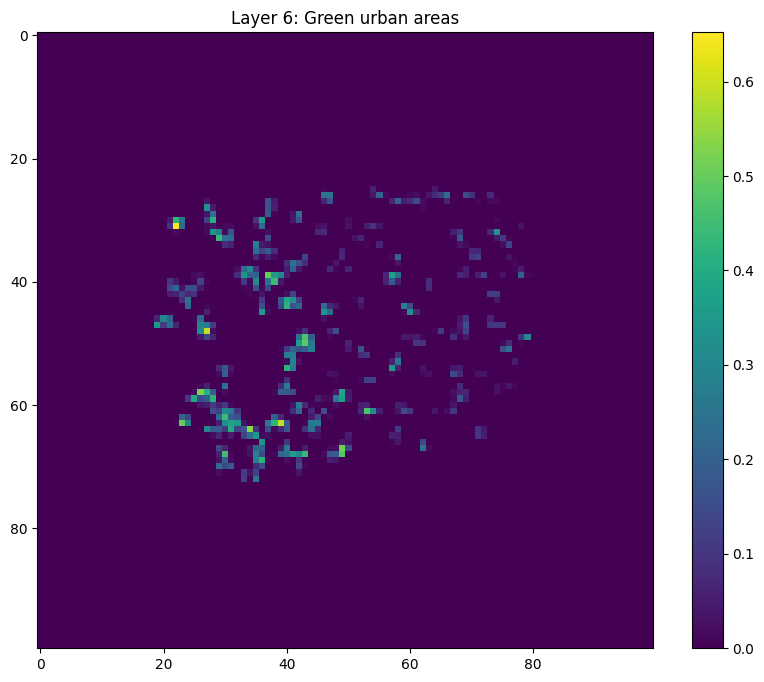

Visualizing Layer: Land without current use


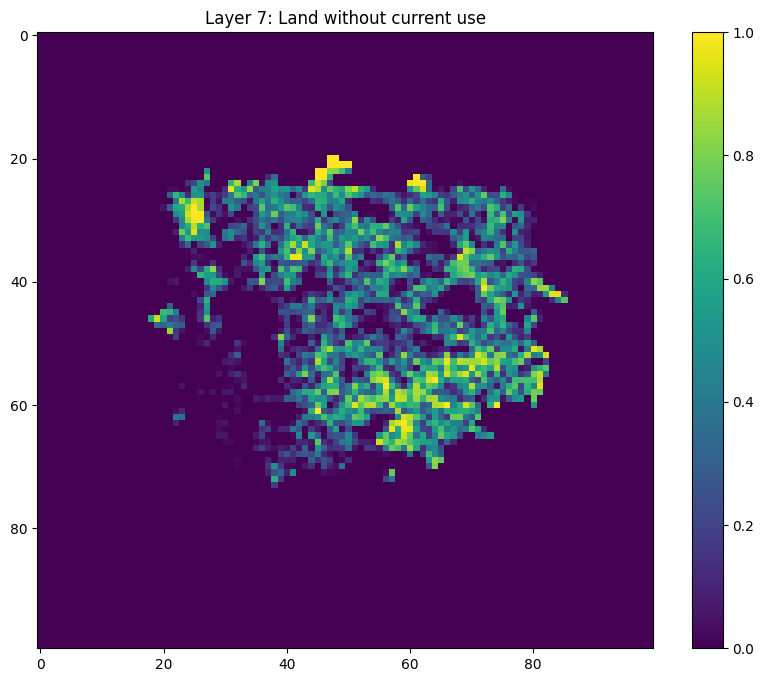

Visualizing Layer: Railways and associated land


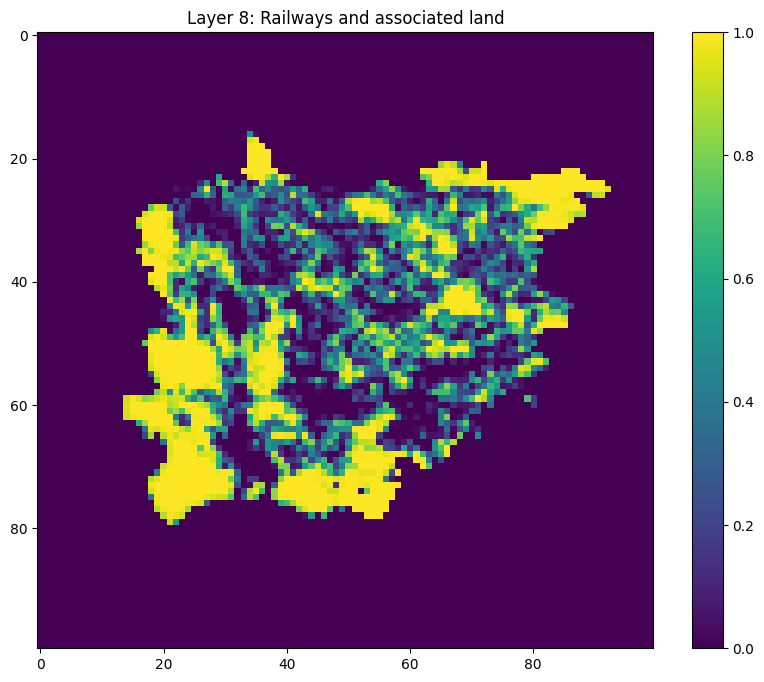

Visualizing Layer: Sports and leisure facilities


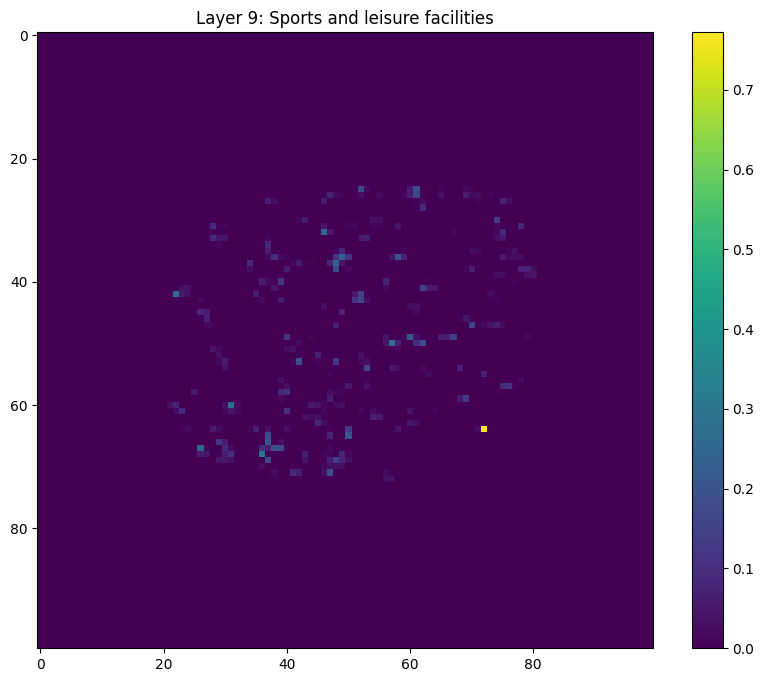

Layer 10: Water bodies - All zero data


In [42]:
import numpy as np

# Load the NPZ file
data = np.load(r'C:\Users\lyq09mow\Data\Kaiserslautern\kaiserslautern-de\ground_truth_class_raster_25km.npz')

arr_0 = data['arr_0']
arr_1 = data['arr_1']

# Function to visualize a layer
def visualize_layer(layer, title):
    plt.figure(figsize=(10, 8))
    plt.imshow(layer, cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.show()

# Check each layer and visualize if it contains non-zero data
for i in range(arr_0.shape[2]):
    if np.any(arr_0[:, :, i]):
        print(f"Visualizing Layer: {arr_1[i]}")
        visualize_layer(arr_0[:, :, i], f"Layer {i}: {arr_1[i]}")
    else:
        print(f"Layer {i}: {arr_1[i]} - All zero data")


In [43]:
# Analyze non-zero layers for statistical properties
for i in range(arr_0.shape[2]):
    if np.any(arr_0[:, :, i]):
        print(f"Statistics for Layer {i} ({arr_1[i]}):")
        print(f"Mean: {np.mean(arr_0[:, :, i])}, Max: {np.max(arr_0[:, :, i])}, Min: {np.min(arr_0[:, :, i])}")


Statistics for Layer 0 (Airports):
Mean: 0.13054746876684434, Max: 1.0, Min: 0.0
Statistics for Layer 4 (Fast transit roads and associated land):
Mean: 0.002218386791997131, Max: 0.9742077216255868, Min: 0.0
Statistics for Layer 5 (Forests):
Mean: 0.005287556831962032, Max: 0.6362620818350707, Min: 0.0
Statistics for Layer 6 (Green urban areas):
Mean: 0.007028805776843933, Max: 0.6522100237405766, Min: 0.0
Statistics for Layer 7 (Land without current use):
Mean: 0.07521148023092064, Max: 1.0, Min: 0.0
Statistics for Layer 8 (Railways and associated land):
Mean: 0.16339149876042494, Max: 1.0, Min: 0.0
Statistics for Layer 9 (Sports and leisure facilities):
Mean: 0.0018441324412819793, Max: 0.7720916277663876, Min: 0.0


In [ ]:
import matplotlib.pyplot as plt

# Assuming the data is 2D, visualize it
plt.imshow(data, cmap='viridis')  # Choose an appropriate colormap
plt.colorbar()
plt.title('Ground Truth Class Raster Visualization')
plt.show()


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

selected_classes = [
    'Airports',
    'Fast transit roads and associated land',
    'Forests',
    'Green urban areas',
    'Industrial, commercial, public, military and private units',
    'Land without current use',
    'Railways and associated land',
    'Sports and leisure facilities',
    'Urban Fabric',
    'Water'
]

# Create a color map with distinct colors for each class
colors = ['#FF0000', '#FFA500', '#008000', '#0000FF', '#800080', 
          '#FFFF00', '#00FFFF', '#FFC0CB', '#808080', '#000000']  # Adjust these colors as needed
cmap = ListedColormap(colors)

# Assuming 'predicted_classes' is an array of indices from predictions
plt.figure(figsize=(10, 8))
plt.imshow(predictions, cmap=cmap)
plt.colorbar(ticks=np.arange(len(selected_classes)), label='Classes')
plt.clim(-0.5, len(selected_classes) - 0.5)
plt.gca().set_yticklabels([''] + selected_classes)  # Adding class names to colorbar
plt.title('Predicted Land Classification for Kaiserslautern')
plt.show()
